
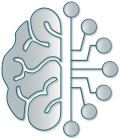

**Start at:** Wednesday 15 November 2023, 15:30:29  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

# Basics of Artificial Neural Networks (ANNs) for supervised learning

## Introduction

### We will work on the iris dataset

<div class="intro">
    
<img src="./DS4B-Slides/perceptron3.jpg" alt="perceptron3" width="1200" style="display: block; margin: 0 auto; align:center"/>
</div>

### Goal

<div class="intro">

The linear relationship between the length and width of petals has already been underlined, whatever the species

<p style="text-align: center"><img width="500px" src="DS4B-svg/jointplot_petals.png" style="margin-left:auto; margin-right:auto" id="img_jpc"/></p>

</div>
<br>
<div class="intro">

We are going to illustrate the difference between the 1D linear regression with the least-squared techniques available in SciPy or scikit-learn and the 1D linear regression done with a single neuron, the so-called **perceptron model**.

<img src="./DS4B-svg/SingleNeuron-dallE.png" alt="perceptron" width="300" style="display: block; margin: 0 auto; align:center"/>

</div>

### How to do that with python? With tensorflow.keras

#### Introduction

<div class="intro">
    
[TensorFlow](https://www.tensorflow.org/) is the premier open-source deep learning framework developed and maintained by Google. Although using TensorFlow directly can be challenging, the modern tf.keras Application Programming Interface (API) brings [Keras](https://keras.io/)’s simplicity and ease of use to the TensorFlow project. Keras is an open-source deep learning library written in Python. The project was started in 2015 by Francois Chollet. It quickly became a popular framework for developers, becoming one of, if not the most, popular deep learning libraries.

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

**Using tf.keras allows you to design, fit, evaluate, and use deep learning models to make predictions in just a few lines of code.** It is one reason that explains its popularity. It makes common deep learning tasks, such as classification and regression predictive modeling, accessible to average developers looking to get things done.

In this tutorial, you will discover a step-by-step guide to developing a **perceptron model** in TensorFlow using the tf.keras API

<img src="./DS4B-Slides/tf.keras.png" alt="tf.keras" width="500" style="display: block; margin: 0 auto; align:center"/>


</div>

#### What is the necessary mathematical prerequisite?

<div class="intro">

Not that much, in the first place. **You do not need to know the math first**. Yet, a fair knowledge in the tools from linear algebra, probability, and statistics is necessary. From a practical point of view, you will use codes and explore algorithmic behavior with different inputs and outputs. Knowing the math will not tell you what algorithm to choose or how to configure it best. You can only discover that through careful, controlled experiments.

**You do not need to know how the algorithms work**. Knowing the limitations and how to configure deep learning algorithms is important. But **learning about algorithms can come later**. You need to build up this algorithm knowledge slowly over a long period of time

**You do not need to be a deep learning expert**. You can learn about the benefits and limitations of various algorithms later. There are plenty of tutorials and examples on the web that you can work on later.
</div>

## Linear Regression

<div class="rq">

Before playing with the perceptron model, let's do an "ordinary" linear regression, which involves minimizing the sum of squared differences (least squares) between the observed and predicted value.
</div>

### "Ordinary" least squared fit linear regression with scikit learn

#### Introduction

<div class="intro">

`LinearRegression` is a class in the scikit-learn library, which is a popular machine learning library in Python. This class provides an implementation of linear regression for both simple and multiple linear regression problems. It uses the least squares method to estimate the coefficients. 
    

<img src="./DS4B-Slides/perceptron4.jpg" alt="perceptron4" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

#### Workflow

<div class="intro">

Here's a brief overview of how you can use the LinearRegression class in scikit-learn:

</div>
<br>
<div class="introT" title="Import the LinearRegression class and create an instance of the LinearRegression class">

<br>

```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
```
</div>
<br>
<div class="introT" title="Fit the model to your data">

<br>

```python
model.fit(X, y)
```
<br>
X is the feature matrix (in the case of simple linear regression, it would be a one-dimensional array or column vector).
y is the target variable.

</div>
<br>
<div class="introT" title="Make predictions">

<br>

```python
predictions = model.predict(X_new)
```
<br>
X_new is the new data for which you want to make predictions.

</div>
<br>
<div class="introT" title="Access the model parameters">

<br>

```python
coefficient = model.coef_
intercept = model.intercept_
```
<br>
coef_ gives you the coefficients (slopes) of the linear regression model.
intercept_ gives you the intercept of the model
</div>

#### Application

In [2]:
import pandas as pd
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
display(dfi)

from sklearn.linear_model import LinearRegression
pw = dfi["petal_width"].values.reshape(-1,1)
#print(pw.shape)
#print(pw)
pl = dfi["petal_length"].values
# creation of the LinearRegression object
fitlin = LinearRegression()

# search for the parameters a and b of the linear model
fitlin.fit(pw, pl)
pl_hat=fitlin.predict(pw)
a = fitlin.coef_
b = fitlin.intercept_
from sklearn.metrics import r2_score
r2 = r2_score(pl, pl_hat)
print("a   ={:8.3f}\nb   ={:8.3f}\n\nr^2 ={:8.5f}".format(a[0], b, r2))
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print("MSE ={:8.3f}\nMAE ={:8.3f}".format(MSE(pl,pl_hat), MAE(pl,pl_hat)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


a   =   2.226
b   =   1.091

r^2 = 0.92690
MSE =   0.226
MAE =   0.368


<div class="rq">

The formula $\hat{y}=2.226x+1.091$ is the law that allows to predict the length of a petal as a functions of its width
</div>

<div class="rqE">

The bad news is that the analytical formula

$${\hat{\boldsymbol{\theta}}=(\textbf{X}^{\mathrm{T}}.\textbf{X})^{-1}.\textbf{X}^{\mathrm{T}}.\textbf{Y}}$$

presents a high complexity and cost for real multivariate function $f(x_{1},x_{2},x_{3},...)$
</div>

### Linear regresion with a single neuron: the perceptron model

#### The seminal perceptron model

<div class="intro">

It is shown below. It is a simple binary classification algorithm and serves as the fundamental building block of neural networks. Developed by Frank Rosenblatt in 1957, a perceptron takes a set of binary input features and produces a binary output, making it a binary linear classifier. The model consists of input nodes (features), weights associated with each input, a summation function, an activation function (typically a step function), and an output.

The perceptron's learning is based on the adjustment of weights during training to minimize classification errors. While a single perceptron has limitations, it becomes more powerful when combined into multilayer perceptrons, forming the foundation for more sophisticated neural network architectures. The perceptron laid the groundwork for the development of artificial neural networks and the broader field of deep learning.
    
<img src="./DS4B-Slides/perceptron6.jpg" alt="perceptron6" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

#### A perceptron with a single input value and no action (activation) potential

<div class="intro">

A single neuron is enough for predicting the length of a petal as a function of its width, given that there seems to be a linear relationship between bowth properties. It's similar to the <a href="https://en.wikipedia.org/wiki/Perceptron">perceptron invented by Rosenblatt</a> in 1958, except that here we're going to optimise weight and bias with the backpropagation algorithm, which is more recent (1974) and whose principle has renewed interest in neural networks. The perceptron is a single layer feed-forward neural network.

This will also give us the opportunity to focus on the quite simple mathematical modelling of a neuron, summarised in the figure below 
<br><br>
<p style="text-align: center"><img width="350px" src="DS4B-svg/1neuron-perceptron-wBackP.png" style="margin-left:auto; margin-right:auto" id="img_perceptron"/></p>

The neuron receives the input information *x* and optimising the weight of the neuronal connection (*w*) between it and the input neuron will enable it to reproduce the value to be reproduced (*y*) as well as possible, with the bias (*b*) allowing this fit to be adjusted. This optimisation scheme is carried out for all the training data. 

**Backpropagation**, short for "backward propagation of errors," is a supervised learning algorithm used in the **training** of this neuron. It is a key optimization algorithm for adjusting the weights of the neuron's weight and bias to minimize the difference between the predicted output and the actual output. Using a knowledge acquisition vocabulary, it gives a **feedback** to the model.
</div>

#### Workflow

<div class="intro">

It is summarized in the figure below

<p style="text-align: center"><img width="700px" src="DS4B-svg/BilanML-Classification-English.png" style="margin-left:auto; margin-right:auto" id="workflow"/></p>

</div>

#### Data reading and importation of libraries

In [3]:
import numpy as np 
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from IPython.display import display


dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

2023-11-15 15:30:31.020986: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 15:30:31.051451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 15:30:31.179535: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 15:30:31.180549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 15:30:32.098651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Holdout method

<div class="intro">

Model evaluation using the hold-out method entails splitting the dataset into training and test datasets in order to evaluate the performance of the model on data it has not been trained on

</div>
<br>
<div class="rq">

**It's exactly like a human being's learning process**. Students learns a certain number of concepts, equations, ideas and applications. They are then assessed on their ability to deal correctly with a new problem within the field of application of what they have learned. 

A "simple" machine learning algorithm does not learn concepts. It learns from a large number of examples to **make the link** between input properties *X*, called **descriptors or features**, and one or more related properties *y*, also called **attributes**. 

How this is linked is generally obscure, although there are algorithms that can help identify which descriptors the properties to be reproduced seem to depend on the most.
</div>
<br>
<div class="intro">

<img src="./DS4B-svg/Basic-holdout-English.svg" alt="holdout" width="400" style="display: block; margin: 0 auto; align:center"/>

</div>

In [4]:
data_train = dfi.sample(frac=0.8, axis='index') 
data_test  = dfi.drop(data_train.index)
x_train = data_train[['petal_width']]
y_train = data_train[['petal_length']]
x_test = data_test[['petal_width']]
y_test = data_test[['petal_length']]

#### Definition and training of the model

<div class="intro">

The ML model development actually requires to:
- Define the model
- Compile the model
- Fit the model
- Evaluate the model
- Make predictions
  
</div>
<br>
<div class="introT" title="Define the model">

We will use the **sequential model API**, that is the simplest and the recommended API, especially when getting started. It is referred to as “sequential” because it involves defining a [Sequential class](https://keras.io/api/models/sequential/) and adding layers to the model one by one in a linear manner, from input to output. The perceptron example below defines a Sequential MLP model that accepts one input and that has an output layer with one node to predict a numerical value. 


```python
# define the model
model = keras.models.Sequential()
model.add(keras.layers.Input(1, name='inpLayer'))
model.add(keras.layers.Dense(1, name='outLayer'))
```

</div>

<div class="introT" title="Compile the model">

Optimizing the model consists in finding the optimal weights and biases that fit the expected outcome of the ANN:
<img src="./DS4B-Slides/perceptron7.jpg" alt="perceptron7" width="1200" style="display: block; margin: 0 auto; align:center"/>


Prior to the optimization, it is necessary to compile the model. It requires first selecting the loss function that you want to optimize, such as mean squared error (MSE). It also requires that you select an algorithm to perform the optimization procedure, typically stochastic gradient descent or a modern variation, such as Adam.

```python
# compile the model
model.compile(optimizer = 'adam',
              loss      = 'mse',
              metrics   = ['mae', 'mse'] )

```
</div>


<div class="introT" title="Fit the model">
    
Fitting the model requires that you first select the training configuration, such as:
- the number of epochs = loops through the training dataset = iterations of the optimizer, as shown in the figure above
- the batch size = number of samples in an epoch used to estimate model error

**Training** is another term that designates this fitting part. The chosen optimization algorithm is actually applied to minimize the chosen loss function and updates the model using the backpropagation of the error algorithm.

Fitting the model is the slow part of the whole process and can take seconds to hours to days, depending on the complexity of the model, the hardware you’re using, and the size of the training dataset

``` python
# fit the model
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
```

A callback was added, namely

```python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
```

<br>
The `EarlyStopping` callback stops training when a monitored metric has stopped improving. It's nothing else than a threshold to stop the optimization process.
</div>

<div class="introT" title="Evaluate the model">

Evaluating the model requires that you first choose a **holdout dataset** used to evaluate the model. This should be data not used in the training process so that you can get an unbiased estimate of the performance of the model when making predictions on new data.

The speed of a model evaluation is proportional to the amount of data you want to use for the evaluation, although it is much faster than training as the model is not changed.

From an API perspective, this involves calling a function with the holdout dataset and getting a loss and perhaps other metrics that can be reported.

The **accuracy of the model** will be demonstrated in the next subsection. 
</div>

<div class="introT" title="Make predictions">

Making a prediction is the final step in the life cycle. It is **why we wanted the model in the first place**.

It requires you have new data for which a prediction is required, e.g., where you do not have the target values.

From an API perspective, you simply call a function to make a prediction of a class label, probability, or numerical value—whatever you designed your model to predict.

```python
ANNmodel.predict(x)
```
</div>
<br>
<div class="rq">

Let's start with the definition of the model and its fit
</div>

2023-11-15 15:30:50.949822: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 outLayer (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


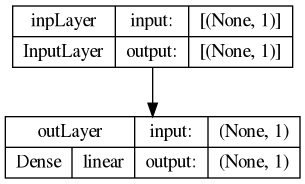

In [5]:
def define_1ANN():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(1, name='inpLayer'))
    model.add(keras.layers.Dense(1, name='outLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
ANNmodel=define_1ANN()
ANNmodel.summary()

from tensorflow.keras.utils import plot_model
plot_model(ANNmodel, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [6]:
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

Epoch 1/700
12/12 [==============================] - 1s 14ms/step - loss: 3.3444 - mae: 1.7109 - mse: 3.3444 - val_loss: 2.5691 - val_mae: 1.5525 - val_mse: 2.5691
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 3.2512 - mae: 1.6852 - mse: 3.2512 - val_loss: 2.4807 - val_mae: 1.5249 - val_mse: 2.4807
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 3.1591 - mae: 1.6598 - mse: 3.1591 - val_loss: 2.3954 - val_mae: 1.4976 - val_mse: 2.3954
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 3.0670 - mae: 1.6344 - mse: 3.0670 - val_loss: 2.3135 - val_mae: 1.4710 - val_mse: 2.3135
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 2.9794 - mae: 1.6098 - mse: 2.9794 - val_loss: 2.2328 - val_mae: 1.4443 - val_mse: 2.2328
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 2.8936 - mae: 1.5851 - mse: 2.8936 - val_loss: 2.1537 - val_mae: 1.4175 - val_mse: 2.1537
Epoch 7/700
12/12 [==

#### Accuracy of the model

<div class="intro">
    
The accurracy will now be evaluated by calculating the MAE, MSE and $R^2$ quantities

MAE =  Mean Absolute Error 
$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|\hat{Y}(x_{i})-Y(x_{i})\right|$$

MSE = Mean Squared Error  
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left(\hat{Y}(x_{i})-Y(x_{i})\right)^{2}$$

$R^2$ = Coefficient of Determination
$$R^{2}=1-\frac{\sum_{i}\left(Y(x_{i})-\hat{Y}(x_{i})\right)^{2}}{\sum_{i}\left(Y(x_{i})-\bar{Y}\right)^{2}}$$

</div>

##### Accurracy of the optimized (trained) model

<div class="intro">

MAE and MSE are returned by the model, given the `compile` command:

```python
model.compile(optimizer = 'adam',
              loss      = 'mse',
              metrics   = ['mae', 'mse'] )
```
<br>

They can be obtained with the `evaluate` command.

$R^2$ must be calculated separately. It involves to apply the percepron model on the training and test sets. This is done with the `predict` command. <br>
`predict` returns an array of $\hat{y}$ predicted values.
</div>

In [7]:
from sklearn.metrics import r2_score

EvTrain = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(f"{fg.GREEN}x_train / loss      : {EvTrain[0]:5.4f}")
print(f'x_train / mae       : {EvTrain[1]:5.4f}')
print(f"x_train / mse       : {EvTrain[2]:5.4f}")
ytrain_hat = ANNmodel.predict(x_train)
R2_train = r2_score(y_train,ytrain_hat)
print(f"x_train / R^2       : {R2_train:5.4f}{fg.OFF}")
print()


EvTest = ANNmodel.evaluate(x_test, y_test, verbose=0)
print(f"{fg.BLUE}x_test / loss       : {EvTest[0]:5.4f}")
print(f'x_test / mae        : {EvTest[1]:5.4f}')
print(f"x_test / mse        : {EvTest[2]:5.4f}")
ytest_hat = ANNmodel.predict(x_test)
R2_test = r2_score(y_test,ytest_hat)
print(f"x_test / R^2       : {R2_test:5.4f}{fg.OFF}")


x_train / loss      : 0.2969
x_train / mae       : 0.4328
x_train / mse       : 0.2969
4/4 [==============================] - 0s 2ms/step
x_train / R^2       : 0.9080

x_test / loss       : 0.2316
x_test / mae        : 0.4022
x_test / mse        : 0.2316
1/1 [==============================] - 0s 27ms/step
x_test / R^2       : 0.9089


##### Accurracy as a function of epochs

<div class="intro">

Plotting the loss function or the MAE as a function of epochs is a common practice in machine learning. It serves several purposes and provides insights into the training process:

- **model convergence**: the goal is for the loss to decrease over time. A decreasing loss indicates that the model is learning and improving its ability to make accurate predictions on the training data
- **overfitting and underfitting**:
    - if the loss on the training data continues to decrease while the loss on a validation set (data the model has not seen during training) starts increasing, it might indicate **overfitting**. It occurs when the model learns the training data too well, **including its noise and outliers**, and fails to generalize to new, unseen data.
    - If the loss is still high after many epochs, it might indicate **underfitting**, *i.e.* the model is too simple to capture the underlying patterns in the data
</div>

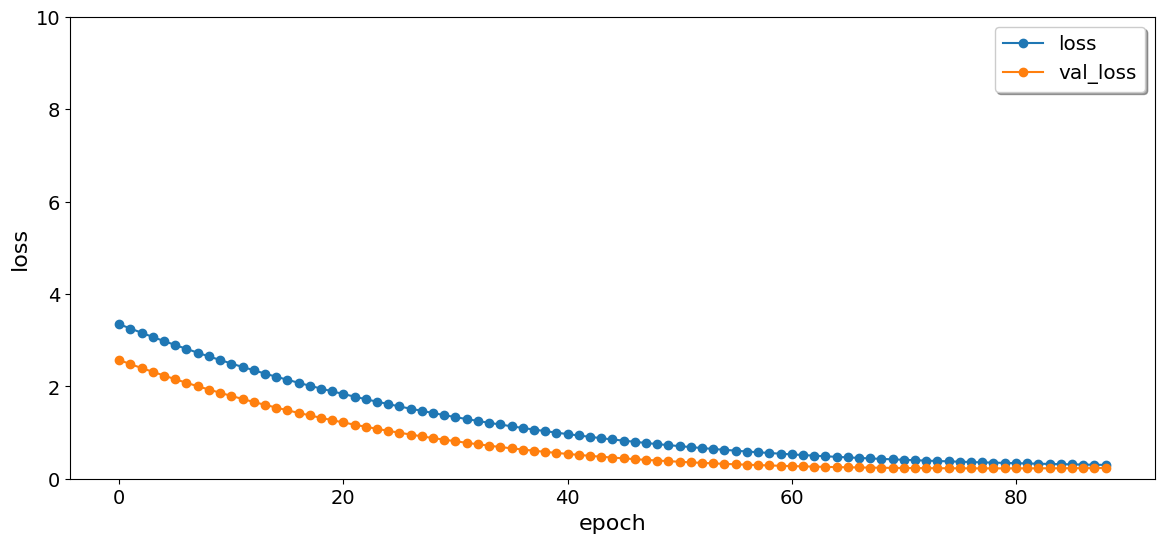

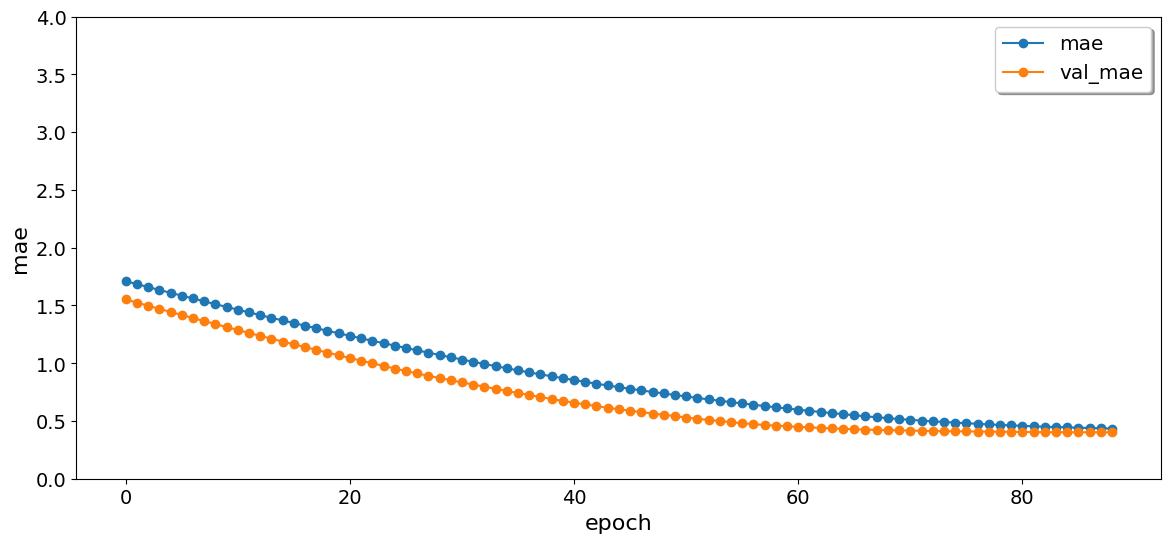

In [8]:
plt.rcParams["figure.figsize"] = (14,6)

df=pd.DataFrame(data=ANNhistory.history)
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,10.0])
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')

figMAE=df.plot(y=["mae","val_mae"],linestyle='-', marker='o',fontsize=14)
figMAE.set_xlabel('epoch',fontdict={'fontsize':16})
figMAE.set_ylabel('mae',fontdict={'fontsize':16})
figMAE.set_ylim([0.0,4.0])
figMAE.legend(loc='upper right', shadow=True, fontsize='x-large')

<div class='rq'>

There is a significant improvement after several tenths of epochs. It's quite a long process for such a simple regression. 

Most of the time, the early stopping is not activated, the training still slightly improves. 

Unless you were unlucky, the training converged well and there is a nice similar performance of the model on both the training set and the validation set. This is the sign that there is no apparent underfitting or overfitting.
</div>

##### Prediction of the petal length of any iris as a function of its width

<div class="intro">

Let's now plot the $\hat{y}_\mathrm{train}$ and $\hat{y}_\mathrm{test}$ values as a function of their actual counterpart. This is a standard way to visually assess the performance of the model. The residual will also be plotted. It is a well-known property used in statistics. It is the difference between the observed value and the estimated value of the quantity of interest. They provide a diagnostic tool to identify potential issues: if there is a **systematic pattern** in the residuals (e.g., a curve or specific shape), it suggests that **the model may be missing some important relationship**. Unusual or extreme values in the residuals may indicate **outliers** in the data.
</div>

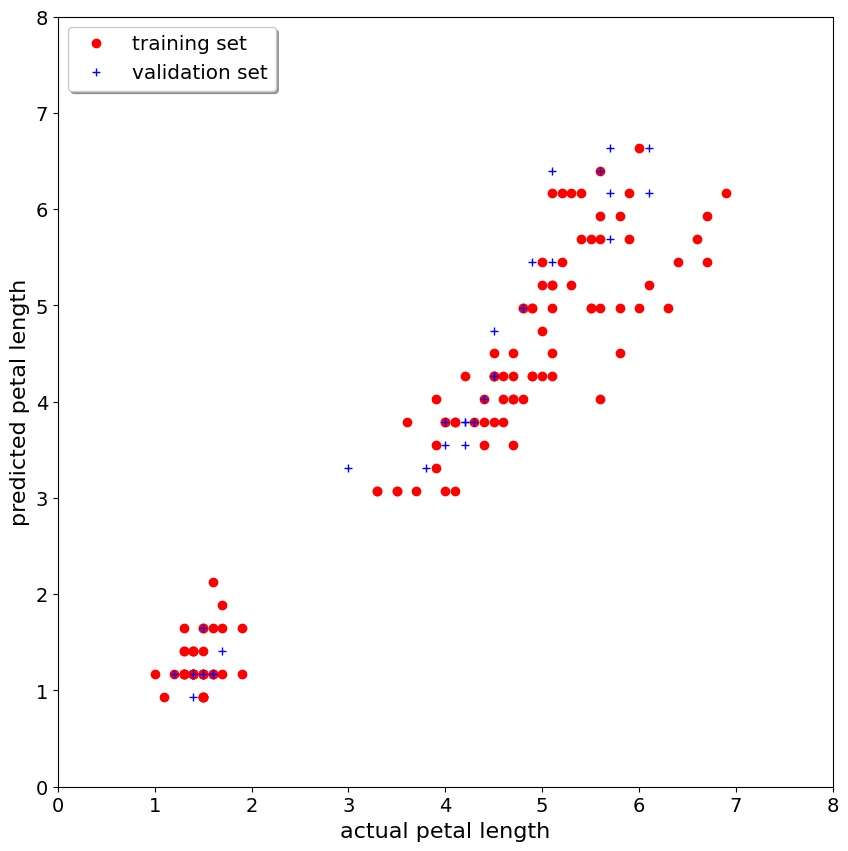

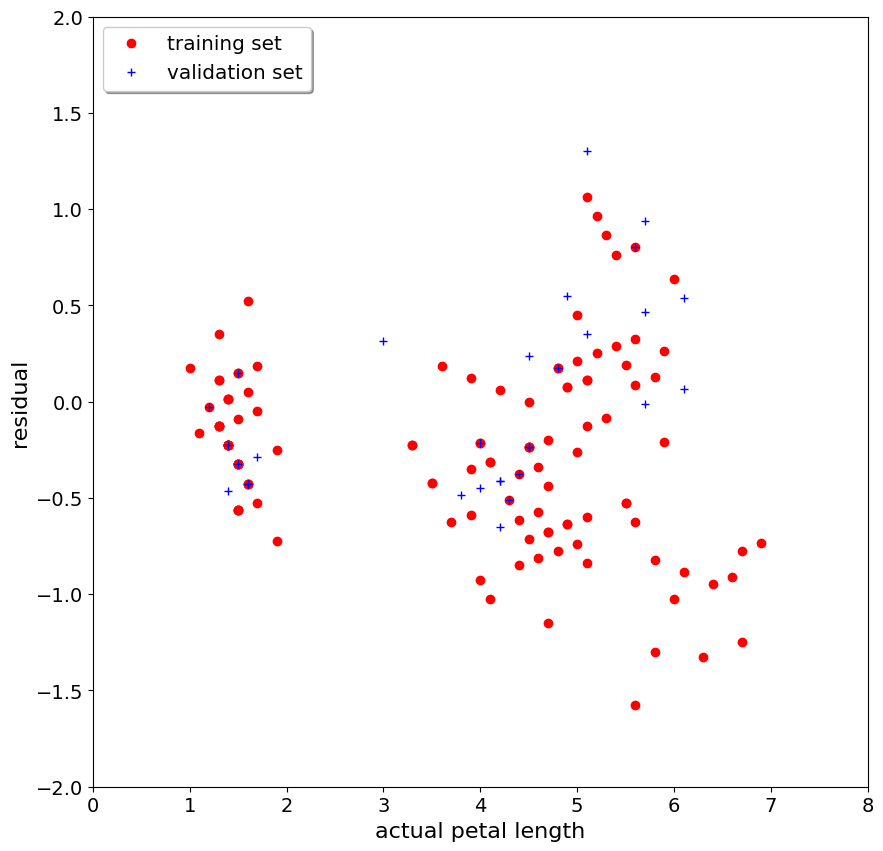

In [9]:
t4pPC.centerTitle("Basic plots")
plt.rcParams["figure.figsize"] = (10,10)

maxL= 8.0
figP, axP = plt.subplots()
axP.plot(y_train,ytrain_hat,'ro',label='training set')
axP.plot(y_test,ytest_hat,'b+',label='validation set')
axP.legend(loc='upper left', shadow=True, fontsize='x-large')
axP.set_xlim(0.0,maxL); axP.set_ylim(0.0,maxL)
axP.set_xlabel('actual petal length',fontsize=16)
axP.set_ylabel('predicted petal length',fontsize=16)
axP.tick_params(labelsize = 14)

diffyt = ytrain_hat - y_train
diffyp = ytest_hat - y_test
figE, axE = plt.subplots()
axE.plot(y_train,diffyt,'ro',label='training set')
axE.plot(y_test,diffyp,'b+',label='validation set')
axE.legend(loc='upper left', shadow=True, fontsize='x-large')
axE.set_xlim(0.0,maxL); axE.set_ylim(-2,2)
axE.set_xlabel('actual petal length',fontsize=16)
axE.set_ylabel('residual',fontsize=16)
axE.tick_params(labelsize = 14)

 Train. mean: -0.262    std: 0.478    MAE: 0.433     R2: 0.964
  Test. mean: -0.009    std: 0.481    MAE: 0.402     R2: 0.975


,Error distribution,Type
0,-0.325889,Test set
1,-0.225889,Test set
2,-0.463528,Test set
3,-0.025889,Test set
4,0.149389,Test set
...,...,...
145,0.964530,Training set
146,0.076335,Training set
147,-0.424777,Training set
148,0.089252,Training set


/tmp/ipykernel_28599/1614879346.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig2=sns.boxplot(data=distrib, x="Error distribution", y="Type", notch=True, orient = 'h',palette='Spectral')


[Text(0, 0.5, '')]

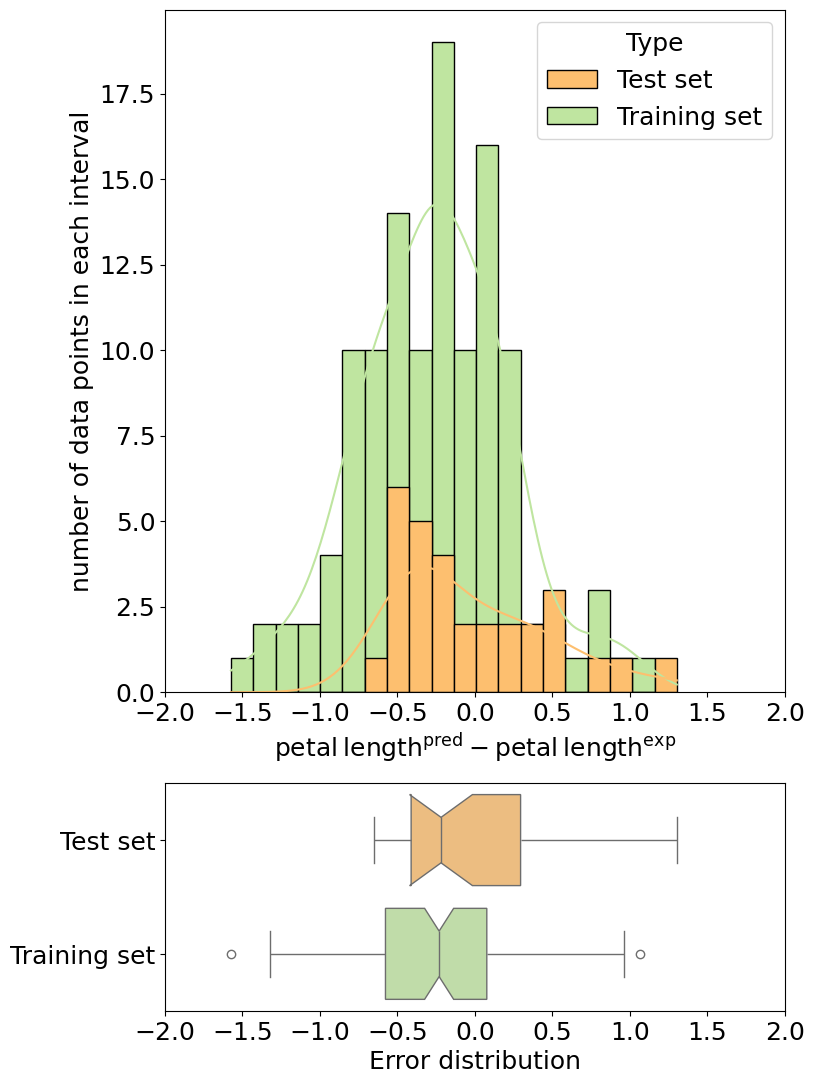

In [10]:
t4pPC.centerTitle("Fancy plots with seaborn")

import seaborn as sns
from matplotlib import gridspec
# print(diffyt.values)
# print(diffyt.values.ravel())
print(f"{fg.GREEN}",
      f"Train. mean: {np.mean(diffyt.values.ravel()):6.3f}",
      f"   std: {np.std(diffyt.values.ravel()):.3f}",
      f"   MAE: {np.average(abs(diffyt.values.ravel())):.3f}",
      f"    R2: {np.corrcoef(y_train.values.ravel(),ytrain_hat.ravel())[0,1]:.3f}"
     )
print(f"{fg.BLUE}",
      f" Test. mean: {np.mean(diffyp.values.ravel()):6.3f}",
      f"   std: {np.std(diffyp.values.ravel()):.3f}",
      f"   MAE: {np.average(abs(diffyp.values.ravel())):.3f}",
      f"    R2: {np.corrcoef(y_test.values.ravel(),ytest_hat.ravel())[0,1]:.3f}"
     )

# make a dataframe
df1 = pd.DataFrame(
    {
        "Error distribution": diffyp.values.ravel(),
        "Type": 'Test set'    },
)
df2 = pd.DataFrame(
    {
        "Error distribution": diffyt.values.ravel(),
        "Type": 'Training set'    },
)
distrib=pd.concat([df1,df2],ignore_index=True)
display(distrib)

xlim=2.0
nbins=20
plt.rcParams["figure.figsize"] = (8,13) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (18) #on ajuste la taille des caractères
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.subplot(gs[0])
fig1=sns.histplot(data=distrib,x="Error distribution", hue="Type", bins=nbins, kde=True, palette='Spectral', alpha=1.0)
plt.xlabel("$\mathrm{petal\:length}^{\mathrm{pred}}-\mathrm{petal\:length}^{\mathrm{exp}}$")
plt.ylabel("number of data points in each interval")
plt.xlim(-xlim,xlim)
plt.subplot(gs[1])
plt.xlim(-xlim,xlim)
fig2=sns.boxplot(data=distrib, x="Error distribution", y="Type", notch=True, orient = 'h',palette='Spectral')
fig2.set(ylabel=None)


### Comparison of the least-square fit linear and perceptron-based linear regressions

#### Parameters w and b of the trained perceptron model

<div class="rq">

Given the formula that calculates the output as a function of the input, this is one of the rare cases, if not the only one, where we can directly give meaning to the model parameters.

<p style="text-align: center"><img width="350px" src="DS4B-svg/1neuron-perceptron-woBackP.svg" style="margin-left:auto; margin-right:auto" id="img_perceptron"/></p>

</div>

In [11]:
print(f"{color.BOLD}{color.RED}Output Layer{color.OFF}")
print(f"w: {ANNmodel.layers[0].get_weights()[0]}")
print(f"b: {ANNmodel.layers[0].get_weights()[1]}")

Output Layer
w: [[2.3763902]]
b: [0.6988326]


#### Linear regression with SciPy

In [12]:
from scipy.stats import linregress
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Error on the slope ={stderr:8.3f}\nError on the y-intercept ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Error on the slope =   0.051
Error on the y-intercept =   0.073


#### Graphical comparison

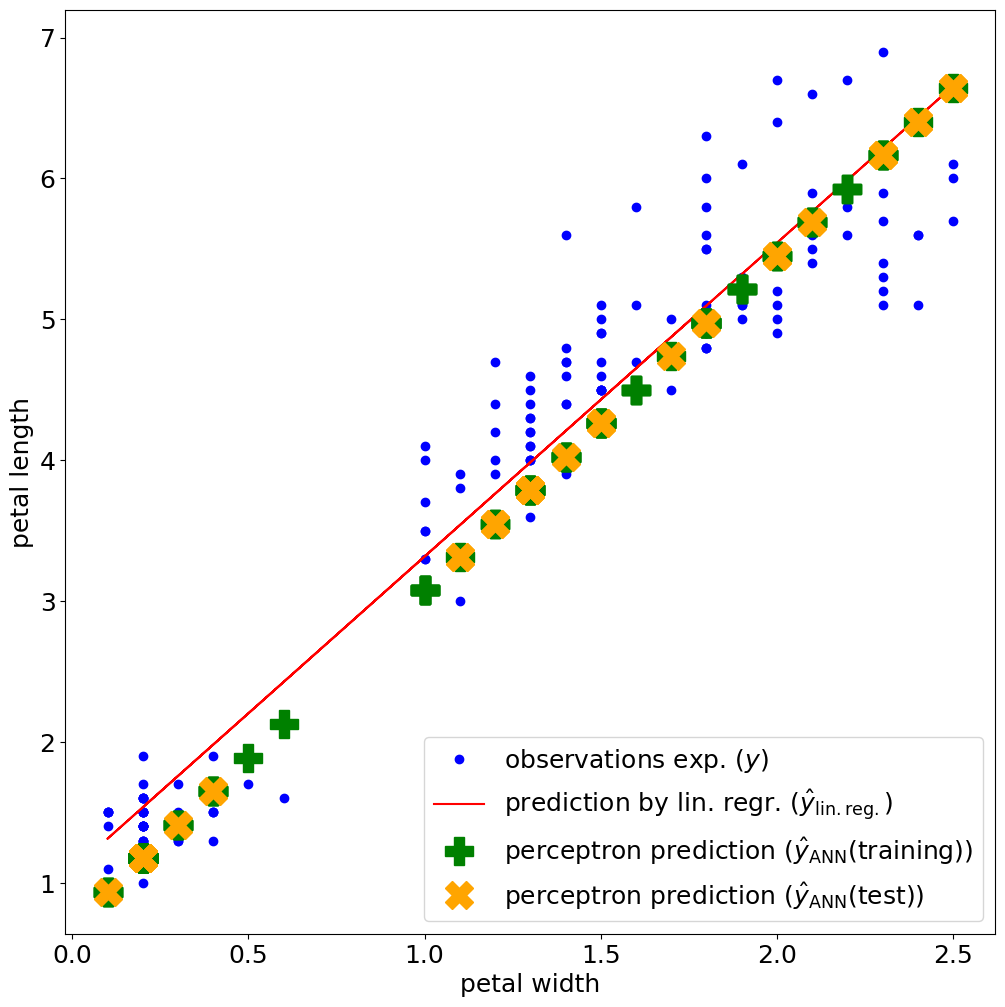

In [13]:
import matplotlib.pyplot as plt

def y_hat(a,b,x):
    return a * x + b
# on calcule pl_hat la longueur prédite, pour chacune des largeurs (pw) mesurées expérimentalement
pl_hat = y_hat(a,b,pw)

plt.rcParams["figure.figsize"] = (12,12) #on ajuste la taille du graphique
plt.plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plt.plot(pw,pl_hat,color='red',label='prediction by lin. regr. ($\hat{y}_\mathrm{lin.reg.}$)')
plt.plot(x_train, ytrain_hat,linestyle='', marker='P', markersize=20, color='green', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{training})$)')
plt.plot(x_test, ytest_hat,linestyle='', marker='X', markersize=20, color='orange', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{test})$)')
plt.xlabel("petal width") # label de l'axe des abscisses
plt.ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

<div class="rq">

The linear regression approach is more accurate. But at this scale, there is in general no significant difference between the two results. Yet, given the random component of the training and of the holdout method, the perceptron may fail.
</div>

## Comments, conclusion and outlook

<div class="rq">

This case is a nice and simple playground to understand the **basic concepts of supervised learning**.

When it comes to 1D linear regression specifically, using a least squares fitting algorithm can often be more computationally efficient and straightforward compared to training a neural network, even a single perceptron.

The least squares fitting method directly calculates the optimal values for the slope and intercept of the linear relationship by minimizing the sum of squared differences between the observed and predicted values. This approach does not require an iterative optimization process, making it computationally efficient for linear regression tasks.

In contrast, training a neural network, even a simple one like a single perceptron, involves an iterative optimization process using methods like gradient descent. **For simple linear regression problems, the additional complexity of a neural network may not be justified when a solution like least squares is available**.

**Yet, for more complex cases, the conclusion would probably not be the same**
</div>

### The perceptron model with an activation function

<div class="intro">

This would be a **logistic regression**, that provides a **classification**. The model would provide a **probability** that a given input data point belongs to a **particular class**. It would require to add an **activation function to the output neuron**. The **loss function** would also differ. The function of choice is the so-called **cross entropy**

<img src="./DS4B-Slides/perceptron8.jpg" alt="perceptron8" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Beyond the perceptron model: deep learning

<div class="intro">

The scheme below illustrates what is deep learning with **dense layers**, also known as **fully connected layers** or **feedforward layers**. It  is a fundamental aspect of neural network architectures. Dense layers are commonly used to model complex relationships in data, making them a crucial component of deep neural network. 

</div>
<br>
<div class="introT" title="Dense layer basics">

- **Neurons and Activation Functions:**
    - A dense layer consists of **neurons** or **nodes**, each associated with a **weight** and a **bias**
    - Neurons apply a **weighted sum** of the input data along with a bias term
    - The result of this sum is often passed through an **activation function**, introducing non-linearity into the model.


- **Weights and Biases:**
    - Each neuron in a dense layer is connected to **every neuron** in the previous layer. These connections are represented by weights.
    - The **weights and biases** are parameters **learned during the training process** to optimize the model for a specific task.


- **Input and Output:** 
    - The **input to a dense layer** is a **vector** (or tensor) of features from the **previous layer**.
    - The **output** is a **transformed representation** of the **input**.

<img src="./DS4B-Slides/perceptron9.jpg" alt="perceptron9" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Architectures of Artificial Neural Networks (ANN): *the neural network zoo*

<div class="intro">

With new neural network architectures popping up every now and then, it’s hard to keep track of them all. Knowing all the abbreviations can also be a bit overwhelming at first. There is very nice cheat sheet on the web, that contains many of those architectures. Most of these are neural networks, some are completely different beasts. This cheat sheet also shows the effort that has to be made to learn these techniques.

[Van Veen, F. & Leijnen, S. (2019). The Neural Network Zoo. © Asimov Institute, 2019](https://www.asimovinstitute.org/neural-network-zoo/)

<img src="./DS4B-Slides/pngs/NeuralNetworkZoo20042019.png" alt="NNZoo" width="800" style="display: block; margin: 0 auto; align:center"/>

</div>

### Is it possible to do machine learning with something else than ANNs?

<div class="intro">

[Yes! see for example "Top 10 Machine Learning Algorithms For Beginners: Supervised, and More"](https://www.simplilearn.com/10-algorithms-machine-learning-engineers-need-to-know-article)

<img src="./DS4B-Slides/perceptron10.jpg" alt="perceptron11" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Prerequisite to do ML on your own

<div class="intro">

<img src="./DS4B-Slides/perceptron11.jpg" alt="perceptron11" width="1200" style="display: block; margin: 0 auto; align:center"/>
<br>
<br>
<img src="./DS4B-Slides/perceptron12.jpg" alt="perceptron12" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

# Useful links

[Wikipedia page on the perceptron model](https://en.wikipedia.org/wiki/Perceptron)

[Hands-on machine learning with scikit-learn, keras and tensorflow (3rd edition, **2022**), Aurélien Géron, O'Reilly editions](https://github.com/ageron/handson-ml3)

[TensorFlow 2 Tutorial: Get Started in Deep Learning with tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)

Some images were generated with [DALL·E](https://openai.com/dall-e-2)

In [14]:
vID.end(cwd0)

**End at:** Wednesday 15 November 2023, 15:30:59  
**Duration:** 00:00:30 792ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>